In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import scipy.optimize as optimization

In [2]:
stocks = ["AAPL", "APH", "CEG", "XOM"]
no_of_trading_days = 252
no_of_portfolios = 10000

In [3]:
start_date = "2020-01-01"
end_date = "2024-02-21"

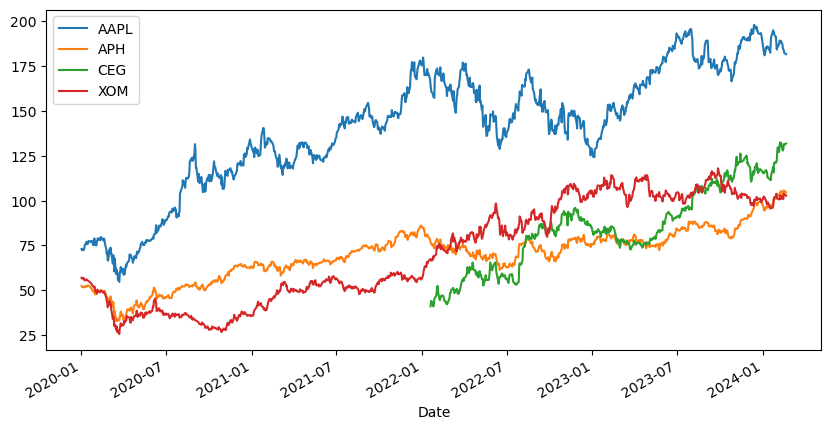

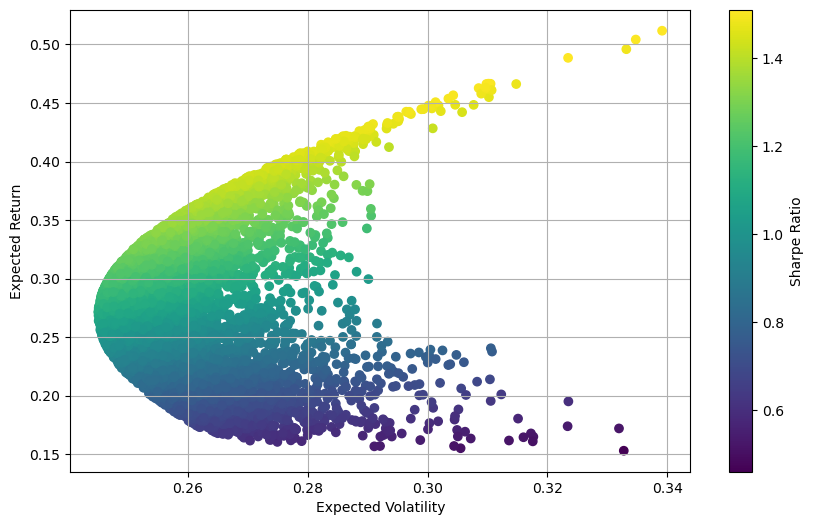

Optimal portfolio: [0.164 0.    0.836 0.   ]
Expected return, volatility and sharpe ratio: [0.5053996  0.33421869 1.51218234]


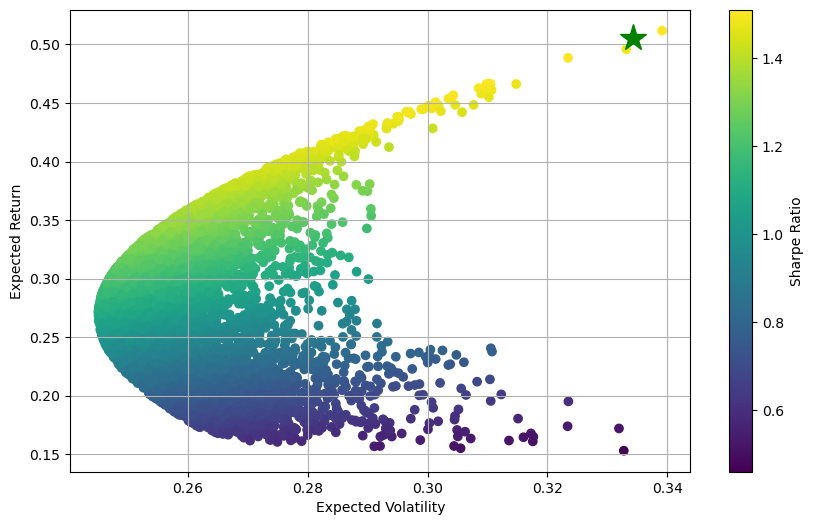

In [4]:
def download_data():  
    
    stock_data = {}

    for stock in stocks:
        ticker = yf.Ticker(stock)
        stock_data[stock] = ticker.history(start = start_date, end = end_date)["Close"]
    return pd.DataFrame(stock_data)

def show_data(data):
    data.plot(figsize=(10, 5))
    plt.show()

#CALCULATE RETURN

def calculate_return(data):
    log_return = np.log(data/data.shift(1))
    return log_return[1:]

def show_stats(returns):
    print(returns.mean() * no_of_trading_days)
    print(returns.cov() * no_of_trading_days)

def show_mean_variance(returns, weights):
    portfolio_return = np.sum(returns.mean() * weights) * no_of_trading_days
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * no_of_trading_days)))
                    
    print("Expected portfolio mean (return):", portfolio_return)
    print("Expected portfolio volatility (standard_Deviation):", portfolio_volatility)

def show_portfolios(returns, volatilities):
    plt.figure(figsize = (10,6))
    plt.scatter(volatilities, returns, c=returns/volatilities, marker = "o")
    plt.grid(True)
    plt.xlabel("Expected Volatility")
    plt.ylabel("Expected Return")
    plt.colorbar(label = "Sharpe Ratio")
    plt.show()
#Generating Portfolio

def generate_portfolios(returns):

    portfolio_mean = []
    portfolio_risks = []
    portfolio_weights = []

    for _ in range(no_of_portfolios):
        w = np.random.random(len(stocks))
        w /= np.sum(w)
        portfolio_weights.append(w)
        portfolio_mean.append(np.sum(returns.mean() * w) * no_of_trading_days)
        portfolio_risks.append(np.sqrt(np.dot(w.T, np.dot(returns.cov() * no_of_trading_days,w))))


    return np.array(portfolio_weights), np.array(portfolio_mean), np.array(portfolio_risks)

def statistics(weights, returns):
    portfolio_return = np.sum(returns.mean()* weights) * no_of_trading_days
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * no_of_trading_days,weights)))
    Sharpe_Ratio = portfolio_return/portfolio_volatility


    return np.array([portfolio_return, portfolio_volatility, Sharpe_Ratio])

#scipy optimize module can find the minimum of a given function
#the maximum of fx function in the minimum of -fx
def min_function_sharpe(weights, returns):
    return -statistics(weights, returns)[2]


def optimize_portfolio(weights, returns):
    constraints = {"type": "eq", "fun": lambda x: np.sum(x) - 1}
    bounds = tuple((0,1) for _ in range(len(stocks))) 
    return optimization.minimize(fun = min_function_sharpe, x0=weights[0], args=returns
                         , method = "SLSQP", bounds = bounds, constraints = constraints)

def print_optimal_portfolio(optimum, returns):
    print("Optimal portfolio:", optimum["x"].round(3))
    print("Expected return, volatility and sharpe ratio:", statistics(optimum["x"].round(3), returns))


def show_optimal_portfolio(opt, rets, portfolio_rets, portfolio_vols):
    plt.figure(figsize=(10,6))
    plt.scatter(portfolio_vols, portfolio_rets, c=portfolio_rets / portfolio_vols, marker = "o")
    plt.grid(True)
    plt.xlabel("Expected Volatility")
    plt.ylabel("Expected Return")
    plt.colorbar(label = "Sharpe Ratio")
    plt.plot(statistics(opt["x"],rets)[1], statistics(optimum["x"], rets)[0], "g*", markersize = 20. )
    plt.show()




if __name__ == "__main__":

    dataset = download_data()
    show_data(dataset)
    log_daily_returns = calculate_return(dataset)
    #show_stats(log_daily_returns)


    pweights, means, risks = generate_portfolios(log_daily_returns)
    show_portfolios(means, risks)
    optimum = optimize_portfolio(pweights, log_daily_returns)
    print_optimal_portfolio(optimum, log_daily_returns)
    show_optimal_portfolio(optimum, log_daily_returns, means , risks)
    
    
 